In [30]:
# Clip part of the spectra in SPE file, save to csv, and glue

import os
import numpy as np
import matplotlib.pyplot as plt
import speutils

# import importlib
# importlib.reload(speutils)

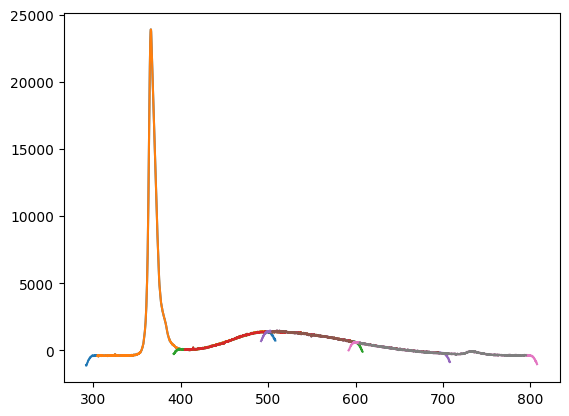

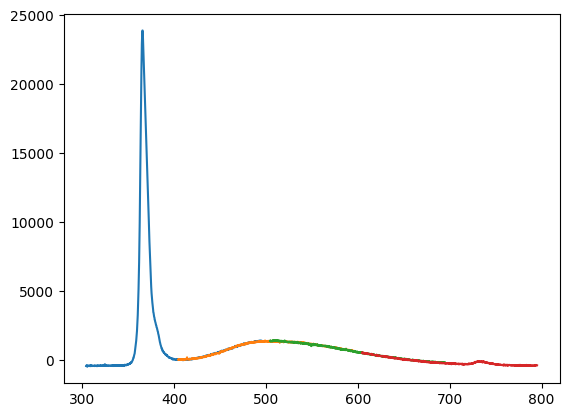

In [58]:
# load SPE data
folder='datafolder/PLhikosaka'
SPE_list=['W009.spe','W010.spe','W011.spe','W012.spe']

fname_list=[]
for spe in SPE_list:
    fname_list.append(folder+'/'+spe)

wl_list = []
spectra_list = []
norm_exp_sec=True
for i, fname in enumerate(fname_list):
    wl, spectrum = speutils.readspe_simple(fname, norm_exp_sec)
    wl_list.extend([wl])
    spectra_list.extend([spectrum])

# check data
length=1024
cut=60

for i,wl in enumerate(wl_list):
    plt.plot(wl,spectra_list[i])
    plt.plot(wl[cut:length-cut],spectra_list[i][cut:length-cut])
plt.show()

for i,wl in enumerate(wl_list):
    plt.plot(wl[cut:length-cut],spectra_list[i][cut:length-cut])
plt.show()    
# plt.plot(wl_list[0],spectra_list[0])
# plt.plot(wl_list[0][cut:length-cut],spectra_list[0][cut:length-cut])
# plt.plot(wl_list[1],spectra_list[1])
# plt.plot(wl_list[1][cut:length-cut],spectra_list[1][cut:length-cut])

In [52]:
fname_list_csv=[]
for i, fname in enumerate(SPE_list):
    fname_list_csv.append(folder+'/'+fname+'.csv')

for i, spectrum in enumerate(spectra_list):
    wl=wl_list[i]
    speutils.savecsv(fname_list_csv[i],wl,spectrum,cut,length-cut+1)

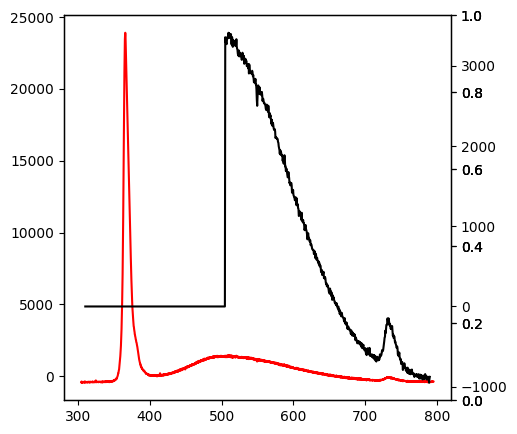

In [61]:
## gluing spectra

fname_out='c_NW.csv'

start=310
end=790
resolution=0.5


edge_processing_mode=2 # do not change !
verbose=False # or True
flag_header=0

wl_dest,spectrum0,flg0 = speutils.gluemultiplecsv(fname_list_csv, start, end, resolution, 
                                                  edge_processing_mode, verbose,flag_header)

## plot
fig = plt.figure(figsize=(5, 5))
fig.tight_layout()
ax1 = fig.add_subplot(111)
# if (logscale):
#            ax1.set_yscale('log')
for i in np.arange(len(wl_list)):
    ax1.plot(wl_list[i][cut:length-cut], spectra_list[i][cut:length-cut], color='red')
    ax2 = ax1.twinx()

# if (logscale):
#            ax2.set_yscale('log')
ax2.plot(wl_dest, spectrum0, color='black')

In [59]:
# save glued spectrum to a csv file

speutils.savecsv(fname_out,wl_dest, spectrum0)